In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("sign_mnist_train.csv")
df_test = pd.read_csv("sign_mnist_test.csv")

In [3]:
df_train.head(6)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255


In [4]:
# https://stackoverflow.com/questions/41624241/pandas-split-dataframe-into-two-dataframes
df_train_targets = df_train.iloc[:, 0]
df_train_images = df_train.iloc[:, 1:]
df_test_targets = df_test.iloc[:, 0]
df_test_images = df_test.iloc[:, 1:]

In [5]:
df_train_images.head(6)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
5,161,168,172,173,178,184,189,193,196,202,...,76,74,68,62,53,55,48,238,255,255


In [6]:
X_train = df_train_images.values
y_train = df_train_targets.values
X_test = df_test_images.values
y_test = df_test_targets.values
# print(y_train.shape)

In [7]:
# https://codereview.stackexchange.com/questions/183658/replacing-letters-with-numbers-with-its-position-in-alphabet
# https://docs.python.org/2/library/string.html
from string import ascii_uppercase

# function to convert 0-25 number to A-Z character 
def to_char(num, char = None):
    char = ascii_uppercase[num]
    return char

y_train_char = np.empty((y_train.shape[0], ), dtype = np.str)
for i in range(y_train.shape[0]):
    y_train_char[i] = to_char(y_train[i])
print(y_train_char)

y_test_char = np.empty((y_test.shape[0], ), dtype = np.str)
for i in range(y_test.shape[0]):
    y_test_char[i] = to_char(y_test[i])
print(y_test_char)

['D' 'G' 'C' ... 'S' 'R' 'X']
['G' 'F' 'K' ... 'C' 'E' 'C']


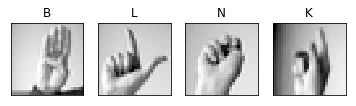

In [8]:
# From demo "demo_mnist_svm" with modifications
def plt_digit(x):
    nrow = 28
    ncol = 28
    xsq = x.reshape((nrow,ncol))
    plt.imshow(xsq,  cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])
    
Iperm = np.random.permutation(X_train[0])
    
for i in range(4):
    ind = Iperm[i]
    plt.subplot(1,4,i+1)
    plt_digit(X_train[ind,:])
    plt.title(y_train_char[ind])

In [9]:
import sklearn
from sklearn import datasets, linear_model, preprocessing
logreg = linear_model.LogisticRegression(verbose=1, multi_class='multinomial', 
                                         solver='lbfgs', max_iter=500)
logreg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.6s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=1, warm_start=False)

In [10]:
yhat_logreg = logreg.predict(X_test)
acc_logreg = np.mean(yhat_logreg == y_test)
print('Accuracy = {0:f}'.format(acc_logreg))

Accuracy = 0.674986


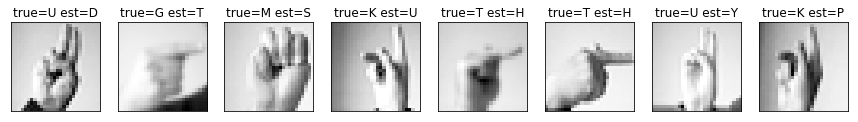

In [11]:
nplt = 8
Ierr = np.where(y_test != yhat_logreg)[0]

Iperm = np.random.permutation(Ierr)

plt.figure(figsize=(15, 4))
for i in range(nplt):        
    plt.subplot(1,nplt,i+1)        
    ind = Iperm[i]    
    plt_digit(X_test[ind,:]) 
    title = "true=" + to_char(y_test[ind]) + " est=" + to_char(yhat_logreg[ind])
    plt.title(title)

In [12]:
# from sklearn.metrics import confusion_matrix
# C = confusion_matrix(y_test,yhat)

# # Normalize the confusion matrix
# Csum = np.sum(C,1)
# C = C / Csum[None,:]

# # Print the confusion matrix
# # print(np.array_str(C, precision=3, suppress_small=True))
# plt.imshow(C, interpolation='none')
# plt.colorbar()

In [13]:
# W = logreg.coef_
# nlabel = W.shape[0]
# plt.figure(figsize=(16, 10))
# for i in range(nlabel):
#     plt.subplot(4,6,i+1)
#     plt_digit(W[i,:])
#     # this array is used to skip J (J=9)
#     array = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
#     plt.title(to_char(array[i]))

In [14]:
from sklearn import svm
# Create a classifier: a support vector classifier with linear kernel
svc = svm.SVC(probability=False, kernel="linear", verbose=1)

svc.fit(X_train,y_train)

[LibSVM]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=1)

In [15]:
yhat_svc_linear = svc.predict(X_test)

In [16]:
acc_svc_linear = np.mean(yhat_svc_linear == y_test)
print('Accuracy = {0:f}'.format(acc_svc_linear))

Accuracy = 0.781651


In [17]:
X_train_subset = X_train[0:10000]
y_train_subset = y_train[0:10000]

In [33]:
print(np.logspace(-5, -10, 6))
#print(1e-7 + 7.5e-8)

[1.e-05 1.e-06 1.e-07 1.e-08 1.e-09 1.e-10]


In [34]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

# usually a range of 10^-3 to 10^3 is sufficient according to source above, so we will do 10^-4 and 10^4
#C_range = np.logspace(2, 18, 9)
#gamma_range = np.logspace(-13, -5, 9)
C_range = np.logspace(0,5,6)
gamma_range = np.logspace(-5, -10, 6)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(svm.SVC(kernel="rbf"), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 1e-07} with a score of 1.00


In [35]:
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

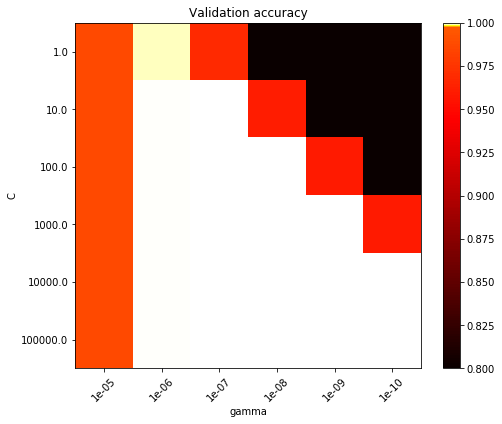

In [36]:
# https://matplotlib.org/tutorials/colors/colormaps.html

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.8, midpoint=0.9975))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [37]:
print(scores)

[[0.98710617 0.99967219 0.96860317 0.70198507 0.21114551 0.04716809]
 [0.98728829 0.99996358 1.         0.96106356 0.70238572 0.21158259]
 [0.98728829 0.99996358 1.         1.         0.95938809 0.70202149]
 [0.98728829 0.99996358 1.         1.         1.         0.95906028]
 [0.98728829 0.99996358 1.         1.         1.         1.        ]
 [0.98728829 0.99996358 1.         1.         1.         1.        ]]


In [38]:
# Create a classifier: a support vector classifier with RBF kernel
svcrbf = svm.SVC(probability=False, kernel="rbf", C=100, gamma=1e-7, verbose=1)
svcrbf.fit(X_train,y_train)

[LibSVM]

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-07, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=1)

In [39]:
yhat_svc_rbf = svcrbf.predict(X_test)
acc_svc_rbf = np.mean(yhat_svc_rbf == y_test)
print('Accuracy = {0:f}'.format(acc_svc_rbf))

Accuracy = 0.815254


In [ ]:
0.815254